In [39]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
# Importing neccessary pacakages
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Answer to Question 1 :
Reading the csv file using pandas and storing it in a dataframe

In [40]:
import pandas as pd
hawk = pd.read_csv("hawks.csv", header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [41]:
# Checking the shape of the data (dimensions)
hawk.shape

# 908 rows and 19 columns

(908, 19)

# Answer to Question 2 :

In [42]:
# Measurements on Three Hawk Species
# The objective of case study is to predict which species out of the 3 hawk species given CH=Cooper's, RT=Red-tailed, SS=Sharp-Shinned based on the different predictor variables given in the dataset.


# Supervised machine learning: because we have labeled data here in the given dataset. 
# We can plan to construct a decision rule bsaed on which we can classify the sample points for the respective species

# Answer to Question 3 : 

In [43]:
hawk.describe()

,Month,Day,Year,Wing,Weight,Culmen,Hallux,Tail,StandardTail,Tarsus,WingPitFat,KeelFat,Crop
count,908.000000,908.000000,908.000000,907.000000,898.000000,901.000000,902.000000,908.000000,571.000000,75.000000,77.000000,567.000000,565.000000
mean,9.842511,15.740088,1998.253304,315.637486,772.080178,21.801498,26.410865,198.831498,199.182137,71.950667,0.792208,2.184303,0.234540
std,0.685717,8.413164,3.454180,95.277591,462.311760,7.284175,17.734704,36.824403,38.197755,17.263204,0.878660,1.044073,0.461597
min,8.000000,1.000000,1992.000000,37.200000,56.000000,8.600000,9.500000,119.000000,115.000000,24.700000,0.000000,0.000000,0.000000
25%,9.000000,9.000000,1995.000000,202.000000,185.000000,12.800000,15.100000,160.000000,162.000000,55.600000,0.000000,2.000000,0.000000
50%,10.000000,16.000000,1999.000000,370.000000,970.000000,25.500000,29.400000,214.000000,215.000000,79.300000,1.000000,2.000000,0.000000
75%,10.000000,23.000000,2001.000000,390.000000,1120.000000,27.300000,31.400000,225.000000,226.000000,87.000000,1.000000,3.000000,0.250000
max,11.000000,31.000000,2003.000000,480.000000,2030.000000,39.200000,341.400000,288.000000,335.000000,94.000000,3.000000,4.000000,5.000000


In [44]:
# We observe NA's in Wing, Weight, Culmen, Hallux, StandardTail, Tarsus, WingPitFat, KeelFat & Crop variables
# Year captured is between 1992 to 2003
# Wing	Length (in mm) of primary wing feather from tip to wrist it attaches to has the mean value of 772 with max being 2030
# Tail	Measurement (in mm) related to the length of the tail has the mean value of 199mm and max being 288mm
# Culmen measurement has a mean value of 21.8mm and a max value of 39.2mm
# Hallux lenth has a mean value of 26.41mm and a max value of 341.4mm

In [45]:
hawk.dtypes

Month             int64
Day               int64
Year              int64
CaptureTime      object
ReleaseTime      object
BandNumber       object
Species          object
Age              object
Sex              object
Wing            float64
Weight          float64
Culmen          float64
Hallux          float64
Tail              int64
StandardTail    float64
Tarsus          float64
WingPitFat      float64
KeelFat         float64
Crop            float64
dtype: object

# Answer to Question 4 :

Text(0, 0.5, 'Count')

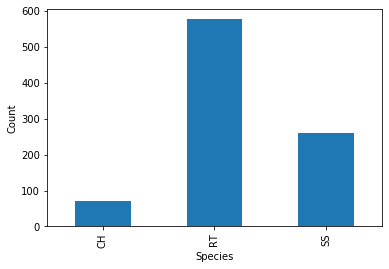

In [46]:
hawk.groupby('Species').size().plot(kind='bar')
plt.ylabel('Count')

In [47]:
hawk['Species'].value_counts()

RT    577
SS    261
CH     70
Name: Species, dtype: int64

# Answer to Question 5 : 

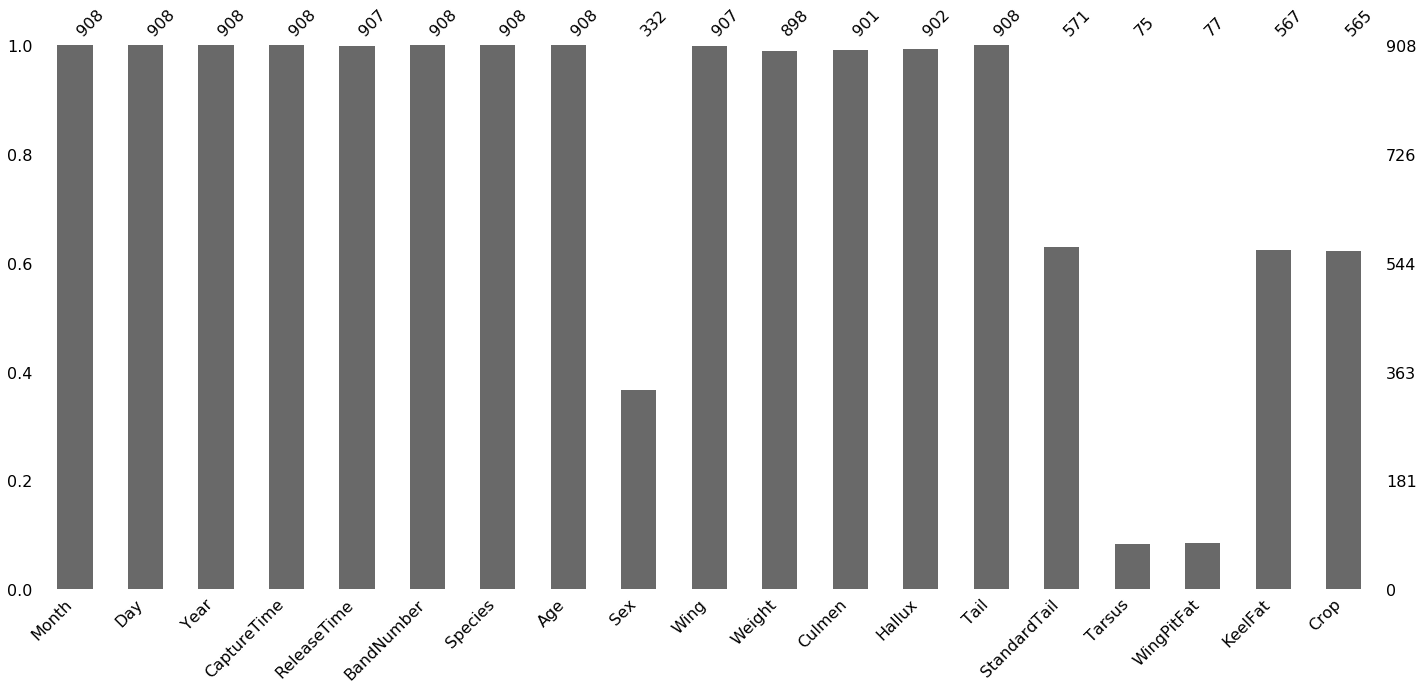

In [48]:
msno.bar(hawk)

In [49]:
hawk= hawk.replace(' ', np.NaN)

In [50]:
hawk = hawk.drop('Tarsus', axis=1)
hawk = hawk.drop('WingPitFat', axis=1)
hawk = hawk.drop('ReleaseTime', axis=1)
hawk = hawk.drop('StandardTail', axis=1)

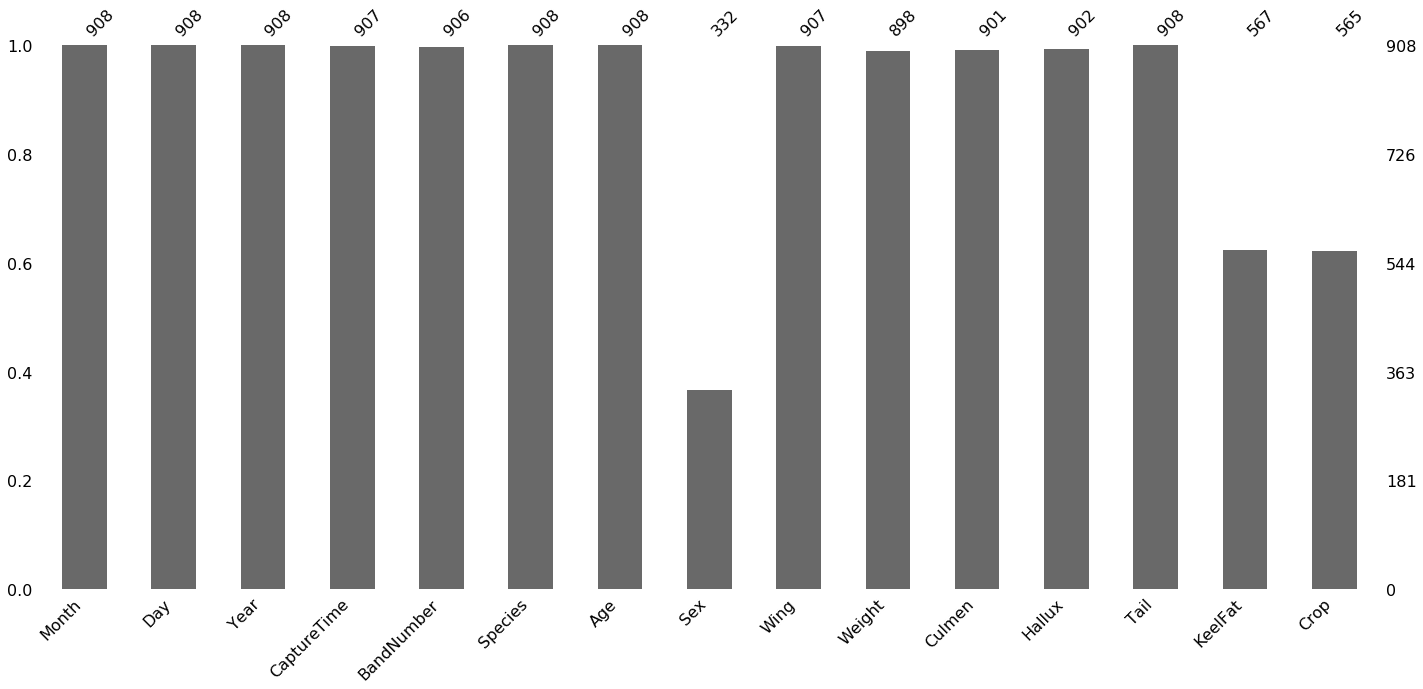

In [51]:
msno.bar(hawk)

In [52]:
print(hawk.describe())

            Month         Day         Year        Wing       Weight  \
count  908.000000  908.000000   908.000000  907.000000   898.000000   
mean     9.842511   15.740088  1998.253304  315.637486   772.080178   
std      0.685717    8.413164     3.454180   95.277591   462.311760   
min      8.000000    1.000000  1992.000000   37.200000    56.000000   
25%      9.000000    9.000000  1995.000000  202.000000   185.000000   
50%     10.000000   16.000000  1999.000000  370.000000   970.000000   
75%     10.000000   23.000000  2001.000000  390.000000  1120.000000   
max     11.000000   31.000000  2003.000000  480.000000  2030.000000   

           Culmen      Hallux        Tail     KeelFat        Crop  
count  901.000000  902.000000  908.000000  567.000000  565.000000  
mean    21.801498   26.410865  198.831498    2.184303    0.234540  
std      7.284175   17.734704   36.824403    1.044073    0.461597  
min      8.600000    9.500000  119.000000    0.000000    0.000000  
25%     12.800000   

# Answer to Question 6 :

In [53]:
hawk['Weight'].fillna((hawk['Weight'][hawk['Species']=='RT']).mean(), inplace = True)
hawk['Weight'].fillna((hawk['Weight'][hawk['Species']=='SS']).mean(), inplace = True)
hawk['Wing'].fillna((hawk['Wing'][hawk['Species']=='CH']).mean(), inplace = True)
hawk['Culmen'].fillna((hawk['Culmen'][hawk['Species']=='RT']).mean(), inplace = True)
hawk['Culmen'].fillna((hawk['Culmen'][hawk['Species']=='SS']).mean(), inplace = True)
hawk['Hallux'].fillna((hawk['Hallux'][hawk['Species']=='SS']).mean(), inplace = True)
hawk['Hallux'].fillna((hawk['Hallux'][hawk['Species']=='RT']).mean(), inplace = True)
hawk['KeelFat'].fillna((hawk['KeelFat'][hawk['Species']=='RT']).mean(), inplace = True)
hawk['KeelFat'].fillna((hawk['KeelFat'][hawk['Species']=='SS']).mean(), inplace = True)
hawk['KeelFat'].fillna((hawk['KeelFat'][hawk['Species']=='CH']).mean(), inplace = True)
hawk['Crop'].fillna((hawk['Crop'][hawk['Species']=='RT']).mean(), inplace = True)
hawk['Crop'].fillna((hawk['Crop'][hawk['Species']=='SS']).mean(), inplace = True)
hawk['Crop'].fillna((hawk['Crop'][hawk['Species']=='CH']).mean(), inplace = True)

# Answer to Question 7 : 

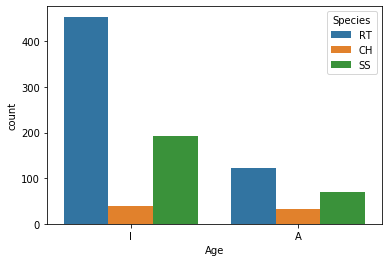

In [54]:
sns.countplot(x="Age",hue="Species", data=hawk)

In [55]:
# CH has almost an equal distribution of Adult and Immature
# RT has higher immature ones compared to Adults...~3x
# SS has higher immature ones compared to Adults...~3x

# Answer to Question 8 :

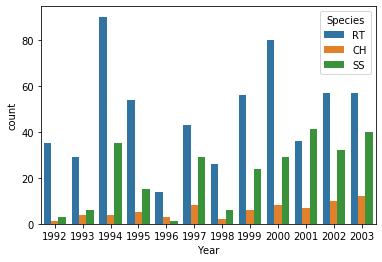

In [56]:
sns.countplot(x="Year",hue="Species", data=hawk)

In [57]:
# In 1994, shows the maximum  count followed by year 2000

# Answer to Question 9 :

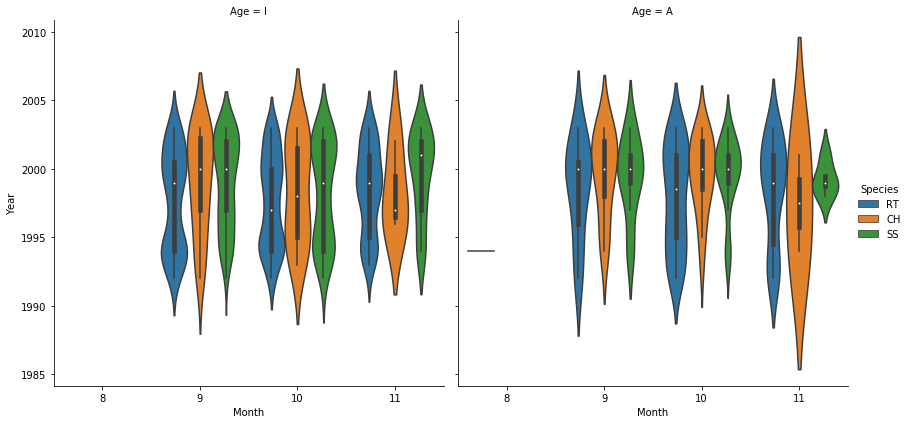

In [58]:
sns.factorplot(x="Month", y="Year", data=hawk, hue="Species",kind="violin", size =6, scale="width", col="Age")

# Anwer to Question 10:

In [59]:
corrMatrix = hawk.corr()
print (corrMatrix)

            Month       Day      Year      Wing    Weight    Culmen    Hallux  \
Month    1.000000 -0.477430  0.011741  0.146884  0.178659  0.147845 -0.001392   
Day     -0.477430  1.000000 -0.021216  0.007896 -0.007984 -0.015587 -0.011083   
Year     0.011741 -0.021216  1.000000 -0.203168 -0.176307 -0.175345 -0.125442   
Wing     0.146884  0.007896 -0.203168  1.000000  0.923226  0.950587  0.433638   
Weight   0.178659 -0.007984 -0.176307  0.923226  1.000000  0.944380  0.424809   
Culmen   0.147845 -0.015587 -0.175345  0.950587  0.944380  1.000000  0.438271   
Hallux  -0.001392 -0.011083 -0.125442  0.433638  0.424809  0.438271  1.000000   
Tail     0.106533 -0.008900 -0.196719  0.899793  0.864865  0.906405  0.415482   
KeelFat  0.029231  0.022448  0.388319 -0.327850 -0.295427 -0.347453 -0.154261   
Crop    -0.085612  0.015013  0.040408 -0.139079 -0.117482 -0.137058 -0.062537   

             Tail   KeelFat      Crop  
Month    0.106533  0.029231 -0.085612  
Day     -0.008900  0.022448 

In [60]:
# Wing , Weight , Culmen & Tail are Highly correlated

# Answer to Question 11 : 

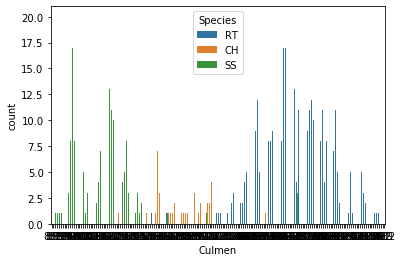

In [61]:
sns.countplot(x= 'Culmen', data = hawk, hue= 'Species')

# Answer to Question 12 :

In [62]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

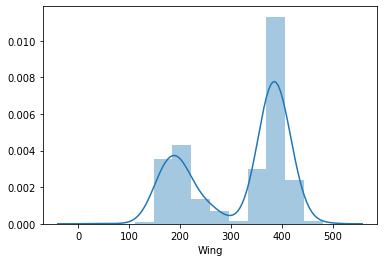

In [63]:
sns.distplot(hawk['Wing']);

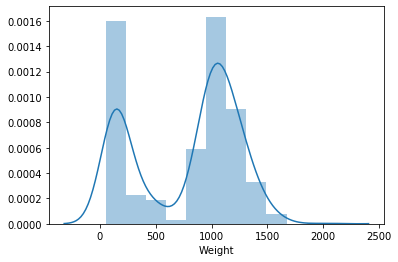

In [64]:
sns.distplot(hawk['Weight']);

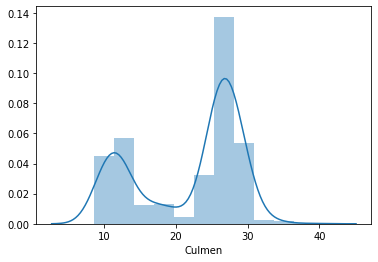

In [65]:
sns.distplot(hawk['Culmen']);

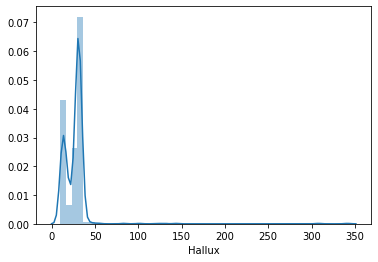

In [66]:
sns.distplot(hawk['Hallux']);

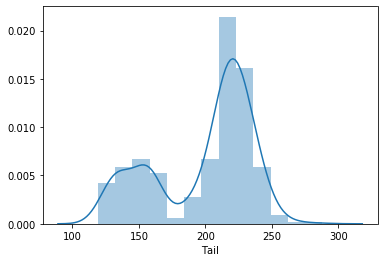

In [67]:
sns.distplot(hawk['Tail']);

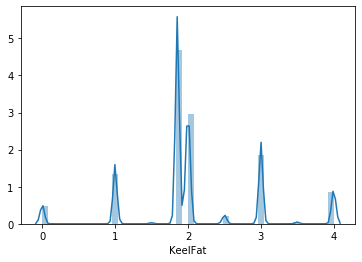

In [68]:
sns.distplot(hawk['KeelFat']);

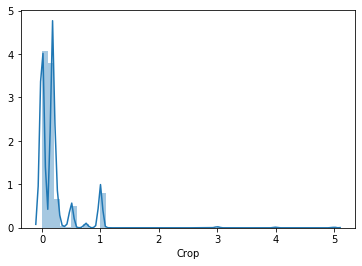

In [69]:
sns.distplot(hawk['Crop']);

# Answer to Question 13 :

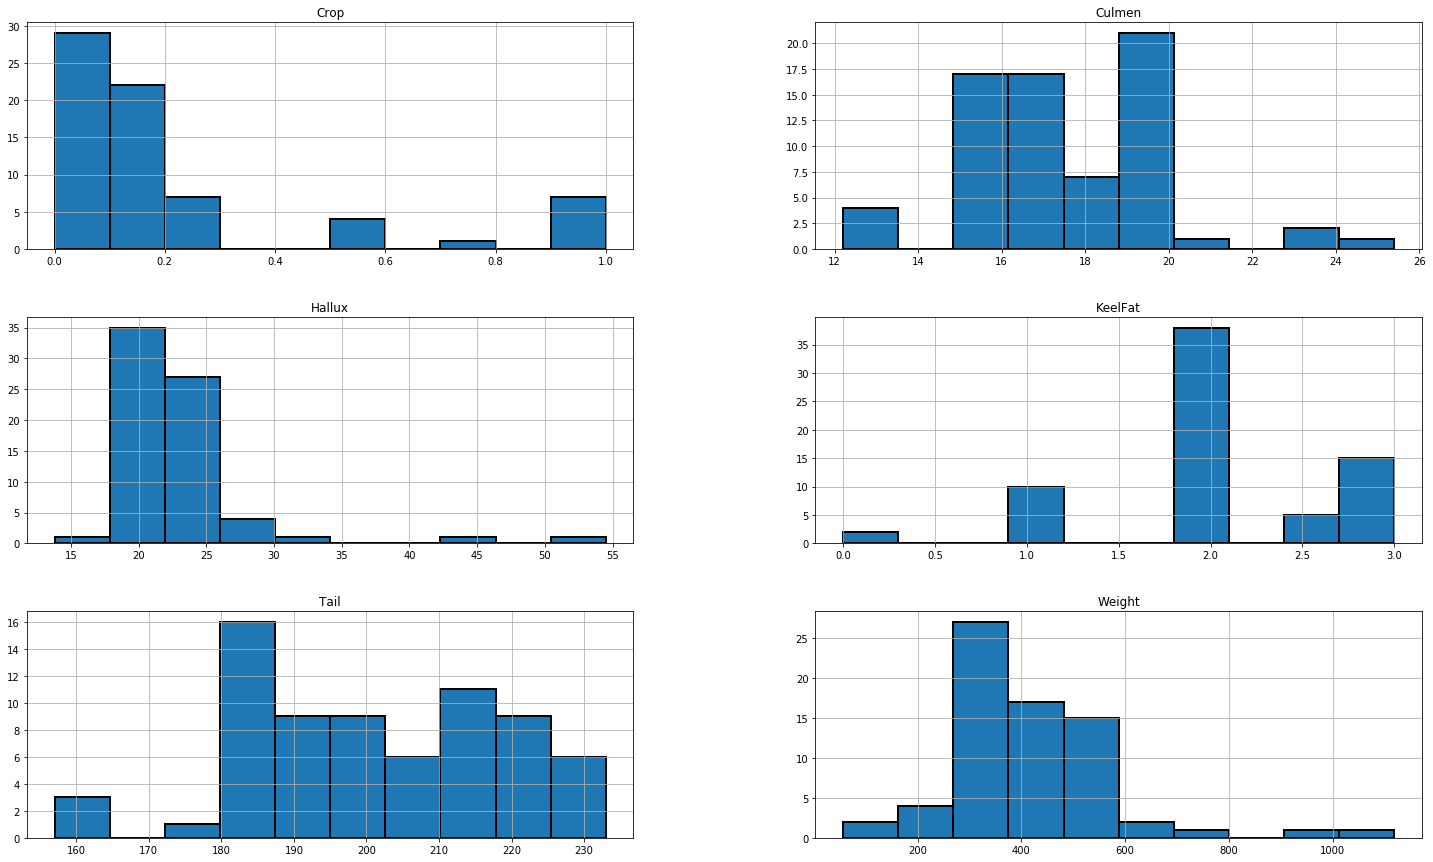

In [70]:
hawk_CH=(hawk.iloc[:, 9:17][hawk['Species']=='CH'])
hawk_CH.hist(edgecolor='black', linewidth=2)
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

# Answer to Question  14 :

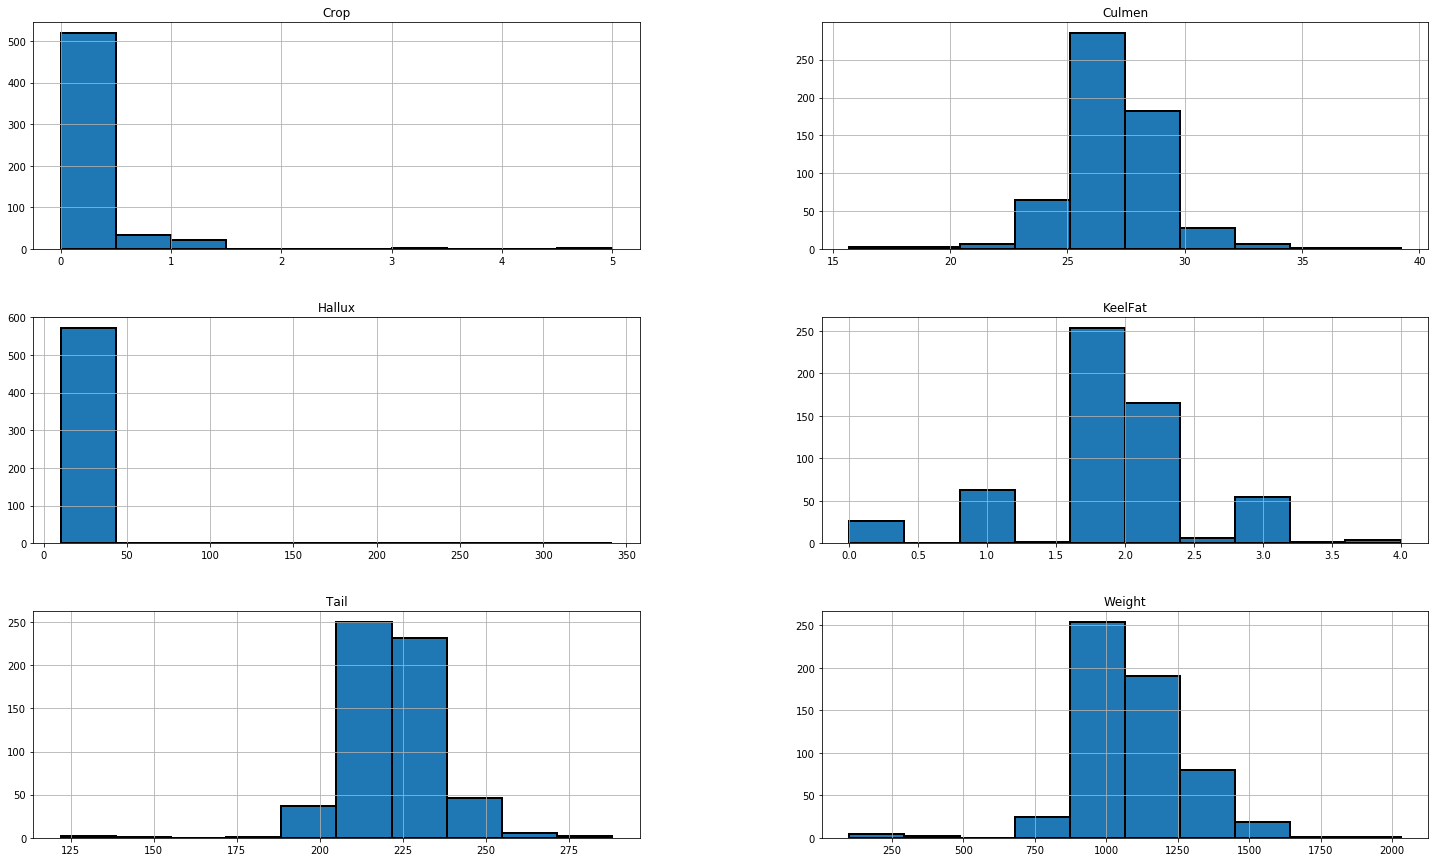

In [71]:
hawk_CH=(hawk.iloc[:, 9:17][hawk['Species']=='RT'])
hawk_CH.hist(edgecolor='black', linewidth=2)
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

# Answer to Question 15 : 

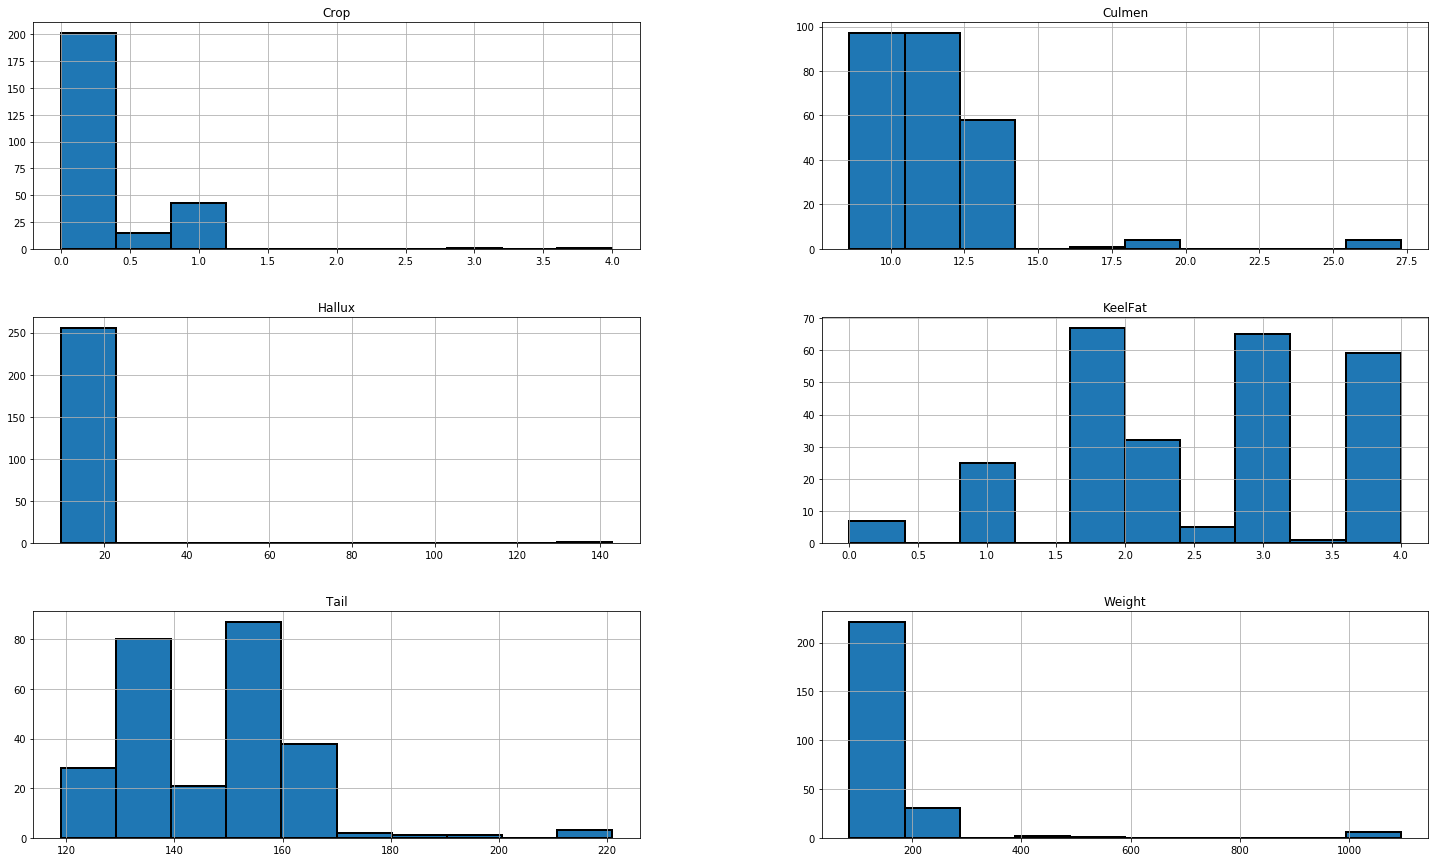

In [72]:
hawk_CH=(hawk.iloc[:, 9:17][hawk['Species']=='SS'])
hawk_CH.hist(edgecolor='black', linewidth=2)
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

# Answer to Question 16 : 

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [87]:
X=hawk[['Wing', 'Weight', 'Culmen', 'Hallux' , 'Tail' , 'KeelFat' , 'Crop']]
y=hawk['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Answer to Question 17 :

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
clf=RandomForestClassifier(n_estimators=100 , class_weight="balanced")

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# Answer to Question  18 :

In [90]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9853479853479854


In [91]:
clf.predict([[392, 1142, 27, 33, 235, 1, 0]])

array(['RT'], dtype=object)

In [92]:
from sklearn.metrics import confusion_matrix 

In [93]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 18,   2,   0],
       [  2, 164,   0],
       [  0,   0,  87]], dtype=int64)

# Answer to Question 19 :

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')

# Answer to Question 20:

In [95]:
logreg_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print('The accuracy of the logistic Regression classifier with 10 fold cross-validation is ' + str(logreg_scores.mean()))

The accuracy of the logistic Regression classifier with 10 fold cross-validation is 0.9439194139194139


In [96]:
print(logreg_scores)

[0.92307692 0.96703297 0.89010989 0.86813187 0.93406593 0.94505495
 0.98901099 0.95604396 0.98888889 0.97777778]


In [97]:
logreg_cv_mean = np.mean(logreg_scores)
logreg_cv_variance = np.var(logreg_scores)

print('logreg Mean score : ', logreg_cv_mean)
print('logreg Score variance : ', logreg_cv_variance)

logreg Mean score :  0.9439194139194139
logreg Score variance :  0.0015055140355506663
